In [1]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as ny
import pandas as ps
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import tree


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
def performance_evaluation(tp, tn, fp, fn, beta=1.0):

   accuracy = (tp + tn) / (tp + fp + fn + tn)
   sensitivity = tp / (tp + fn)
   specificity = tn / (fp + tn)
   precision = tp / (tp + fp)
   recall = sensitivity
   f_score = ( (beta**2 + 1) * precision * recall) / (beta**2 * precision + recall)
   auc = (sensitivity + specificity) / 2
   youden = sensitivity - (1 - specificity)
   p_plus = sensitivity / (1 - specificity)
   p_minus = (1 - sensitivity) / specificity
   dp = (ny.sqrt(3) / ny.pi) * (ny.log(sensitivity/(1 - sensitivity) + ny.log(specificity/(1 - specificity))))

   result = {}
   result["tp"] = tp
   result["tn"] = tn
   result["fp"] = fp
   result["fn"] = fn
   result["accuracy"] = accuracy
   result["sensitivity"] = sensitivity
   result["specificity"] = specificity
   result["precision"] = precision
   result["recall"] = recall
   result["f-score"] = f_score
   result["AUC"] = auc
   result["Youden"] = youden
   result["p+"] = p_plus
   result["p-"] = p_minus
   result["DP"] = dp

   return result

In [3]:
set = ps.read_csv("voice.csv")


In [4]:
set.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
ny.mean(set)

meanfreq     0.180907
sd           0.057126
median       0.185621
Q25          0.140456
Q75          0.224765
IQR          0.084309
skew         3.140168
kurt        36.568461
sp.ent       0.895127
sfm          0.408216
mode         0.165282
centroid     0.180907
meanfun      0.142807
minfun       0.036802
maxfun       0.258842
meandom      0.829211
mindom       0.052647
maxdom       5.047277
dfrange      4.994630
modindx      0.173752
dtype: float64

In [6]:
set.label = [1 if each == "female" else 0 for each in set.label]


In [7]:
y =set.label.values
x = set.drop(['label'],axis=1)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
svm = SVC(random_state=42)
svm.fit(xtrain, ytrain)
SVM_f=svm.predict(xtest)
conf = confusion_matrix(ytest, SVM_f)

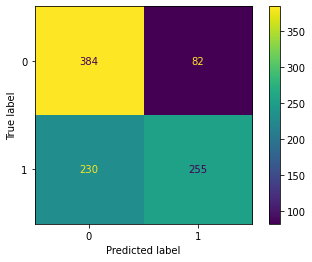

In [9]:
plot_confusion_matrix(svm, xtest, ytest)  
plt.show()

In [10]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
SVM_results = performance_evaluation(TP, TN, FP, FN)
SVM_results.get("Youden")
SVM_results

{'tp': 255,
 'tn': 384,
 'fp': 82,
 'fn': 230,
 'accuracy': 0.6719242902208202,
 'sensitivity': 0.5257731958762887,
 'specificity': 0.8240343347639485,
 'precision': 0.7566765578635015,
 'recall': 0.5257731958762887,
 'f-score': 0.6204379562043796,
 'AUC': 0.6749037653201186,
 'Youden': 0.3498075306402372,
 'p+': 2.9879306009554942,
 'p-': 0.5754939862542955,
 'DP': 0.5378474913211441}

In [11]:
#DecisionTreeClassifier

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
dectree = DecisionTreeClassifier()
dectree.fit(xtrain, ytrain)
DT_f=dectree.predict(xtest) 
conf = confusion_matrix(ytest, DT_f)

In [13]:
tree.export_graphviz(dectree, out_file='deccision_tree_2.dot',
                     feature_names=['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx'],
                     class_names=['Female','Male'],
                     label='all',
                     rounded=True,
                     filled=True)

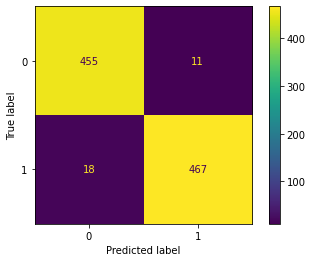

In [14]:
plot_confusion_matrix(dectree, xtest, ytest)  
plt.show()

In [15]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
DT_results = performance_evaluation(TP, TN, FP, FN)
DT_results

{'tp': 467,
 'tn': 455,
 'fp': 11,
 'fn': 18,
 'accuracy': 0.9695057833859095,
 'sensitivity': 0.9628865979381444,
 'specificity': 0.9763948497854077,
 'precision': 0.9769874476987448,
 'recall': 0.9628865979381444,
 'f-score': 0.9698857736240915,
 'AUC': 0.969640723861776,
 'Youden': 0.939281447723552,
 'p+': 40.79137769447042,
 'p-': 0.03801064914466974,
 'DP': 1.8690215757840933}

In [16]:
#Logistic Regression

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.2,random_state = 30)
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
LogReg_f=logreg.predict(xtest)
conf = confusion_matrix(ytest, LogReg_f)

C:\Users\ronys\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


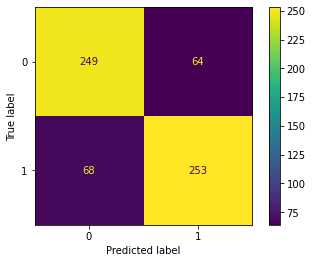

In [18]:
plot_confusion_matrix(logreg, xtest, ytest)  
plt.show()

In [19]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
LogReg_results = performance_evaluation(TP, TN, FP, FN)
LogReg_results

{'tp': 253,
 'tn': 249,
 'fp': 64,
 'fn': 68,
 'accuracy': 0.7917981072555205,
 'sensitivity': 0.7881619937694704,
 'specificity': 0.7955271565495208,
 'precision': 0.7981072555205048,
 'recall': 0.7881619937694704,
 'f-score': 0.7931034482758622,
 'AUC': 0.7918445751594956,
 'Youden': 0.5836891503189912,
 'p+': 3.854604750778816,
 'p-': 0.26628632911709144,
 'DP': 0.8959896785697}

In [20]:
#RandomForestClassifier 

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
randforest = RandomForestClassifier (n_estimators=100, random_state=40)
randforest.fit(xtrain, ytrain)
RF_f=randforest.predict(xtest) 
conf = confusion_matrix(ytest, RF_f)

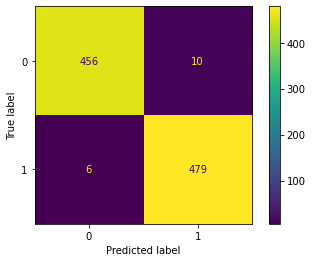

In [22]:
plot_confusion_matrix(randforest, xtest, ytest)  
plt.show()

In [23]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
RF_results = performance_evaluation(TP, TN, FP, FN)
RF_results

{'tp': 479,
 'tn': 456,
 'fp': 10,
 'fn': 6,
 'accuracy': 0.9831756046267087,
 'sensitivity': 0.9876288659793815,
 'specificity': 0.9785407725321889,
 'precision': 0.9795501022494888,
 'recall': 0.9876288659793815,
 'f-score': 0.9835728952772074,
 'AUC': 0.9830848192557852,
 'Youden': 0.9661696385115703,
 'p+': 46.0235051546392,
 'p-': 0.012642430819316286,
 'DP': 2.440556689640832}

In [24]:
#KNeighborsClassifier 


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit (xtrain, ytrain)
KNN_f=knn.predict(xtest) 
conf = confusion_matrix(ytest, KNN_f)

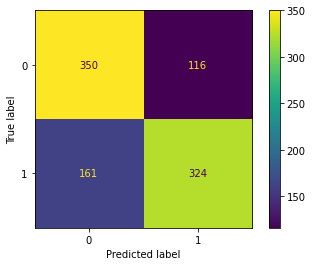

In [26]:
plot_confusion_matrix(knn, xtest, ytest)  
plt.show()

In [27]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
KNN_results = performance_evaluation(TP, TN, FP, FN)
KNN_results

{'tp': 324,
 'tn': 350,
 'fp': 116,
 'fn': 161,
 'accuracy': 0.7087276550998949,
 'sensitivity': 0.668041237113402,
 'specificity': 0.7510729613733905,
 'precision': 0.7363636363636363,
 'recall': 0.668041237113402,
 'f-score': 0.7005405405405406,
 'AUC': 0.7095570992433963,
 'Youden': 0.41911419848679254,
 'p+': 2.6836829008176317,
 'p-': 0.44197938144329907,
 'DP': 0.6267483224367831}

In [28]:
#GradientBoostingClassifier 


In [29]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size=0.3,random_state = 30)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gbc.fit(xtrain, ytrain)
GBC_f=gbc.predict(xtest) 
conf = confusion_matrix(ytest, GBC_f)

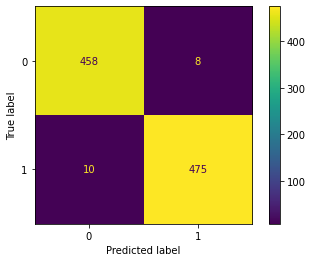

In [30]:
plot_confusion_matrix(gbc, xtest, ytest)  
plt.show()

In [31]:
TP = conf[1,1]
FP = conf[0,1]
TN = conf[0,0]
FN = conf[1,0]
GCB_results = performance_evaluation(TP, TN, FP, FN)
GCB_results

{'tp': 475,
 'tn': 458,
 'fp': 8,
 'fn': 10,
 'accuracy': 0.9810725552050473,
 'sensitivity': 0.979381443298969,
 'specificity': 0.9828326180257511,
 'precision': 0.9834368530020704,
 'recall': 0.979381443298969,
 'f-score': 0.981404958677686,
 'AUC': 0.98110703066236,
 'Youden': 0.9622140613247201,
 'p+': 57.0489690721649,
 'p-': 0.020978706163057706,
 'DP': 2.173615443204584}

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


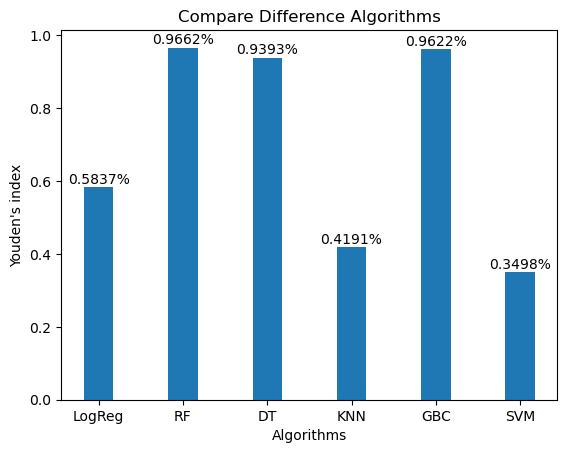

In [33]:
from matplotlib import pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

x = ['LogReg', 'RF', 'DT', 'KNN', 'GBC', 'SVM']
logReg = "{:.4f}".format(LogReg_results.get("Youden"))
rf = "{:.4f}".format(RF_results.get("Youden"))
dt = "{:.4f}".format(DT_results.get("Youden"))
knn = "{:.4f}".format(KNN_results.get("Youden"))
gbc = "{:.4f}".format(GCB_results.get("Youden"))
svm = "{:.4f}".format(SVM_results.get("Youden"))


y = [float(logReg),float(rf),float(dt),float(knn),float(gbc),float(svm)]

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')
ax.set_ylabel("Youden's index")
ax.set_xlabel('Algorithms')
ax.set_title('Compare Difference Algorithms')


for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.01,
      s="{}%".format(height),
      ha='center')
   
plt.savefig('barChart.png')
plt.show()